# Curva de calibração - Dados sem repetição

Este notebook aplica a regressão linear, utilizando a equação da reta, em um conjunto de dados de calibração analítica.

Você obtém:

- Gráfico de dispersão de sinal emitido *versus* concentração do analito
- Regressão linear;
    - Parâmetro $b_1$ (coeficiente linear);
    - Parâmetro $b_0$ (coeficiente angular);
    - Equação da reta:
    - Valores preditos para o sinal ($\widehat{y})$;
    - Gráfico de regressão de sinal emitido *versus* concentração do analito, com a equação da reta;
- Análise de variância (ANOVA);
    - Somatórios quadráticos;
    - Graus de liberdade;
    - Média quadrática;
    - Estatística do teste;
    - Valor crítico do teste;
    - p-valor;
    - Conclusão do teste;
    - Verificações;
    - Tabela de ANOVA;
    - Gráfico da distribuição F;
- Coeficiente de determinação;
    - Coeficiente de determinação ajustado;
- Diagnóstico do modelo;
    - Resíduos;
    - Média dos resíduos igual a zero (teste t de Student pareado);
        - Gráfico da distribuição t de Student;
    - Média dos resíduos com distribuição Normal (teste de Shapiro-Wilk);
    - Independência dos resíduos em relação à ordem de coleta;
        - Gráfico dos resíduos *versus* ordem de coleta;
    - Independência dos resíduos em relação ao ajustamento;
        - Gráfico dos resíduos *versus* sinal predito; 
    - Outliers (Resíduos padronizados)
        - Gráfico dos resíduos padronizados *versus* sinal predito; 
    - Correlação dos resíduos;
        - Gráfico do sinal predito *versus* sinal real;
- Intervalo de confiança dos parâmetros;    
    - Parâmetro $b_1$ (coeficiente linear);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;
    - Parâmetro $b_0$ (coeficiente angular);
        - Desvio padrão;
        - Intervalo de confiança;
        - Valor verdadeiro;
        - Teste de hipótese;
            - Gráfico da distribuição t de Student;   
- Intervalo de confiança do sinal predito;
    - Valores médios;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Valores pontuais;
        - Desvio padrão;
        - Intervalo de confiança;
        - Gráfico de calibração com as bandas médias;
    - Gráfico da curva de calibração;
- Predição de uma nova concentração;    
    - Gráfico de predição


## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

## Entrada de dados

In [2]:
df = pd.DataFrame({
    "Concentração": [0.1, 0.45401, 1.09765, 1.27936, 2.20611, 2.50064, 3.0403, 3.23583, 4.1699, 4.45308,
                     5.28474, 5.59238, 5.92091, 6.66066, 6.79953, 7.97943, 8.41536, 8.70156, 8.71607, 
                     9.16463, 13],
    "Sinal": [-0.0716, 4.1673, 6.5703, 13.815, 11.4501, 12.9554, 20.1575, 17.5633, 26.0317, 22.7573,
              26.303, 30.6885, 33.9402,  30.9228, 34.11, 44.4536, 46.5022, 50.0568, 46.5475, 45.7762, 15],
    "Ordem de coleta": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],    
    "Ensaio": ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", "Ensaio 5", "Ensaio 6", "Ensaio 7",
               "Ensaio 8", "Ensaio 9", "Ensaio 10", "Ensaio 11", "Ensaio 12", "Ensaio 13", "Ensaio 14",
               "Ensaio 15","Ensaio 16", "Ensaio 17", "Ensaio 18","Ensaio 19", "Ensaio 20", "Ensaio 21"
    ],    
})
dataset_name = "Influente"
alfa = 0.05

In [3]:
nome_conc, nome_sinal, nome_ordem, nome_ensaio  = df.columns

### Plotando o gráfico com os dados

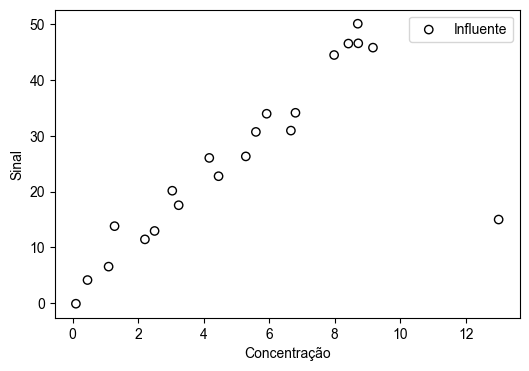

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Leverage

$$ h_{ii} = \frac{1}{n} + \frac{\left(x_{i} - \overline{x} \right)^{2}}{\sum_{i=1}^{n} \left(x_{i} - \overline{x} \right)^{2}}$$

onde:
- $n$ é o número total de amostras;
- $x_{i}$ é a i-ésima observação da amostra;
- $\overline{x}$ é a média da amostra;

$$critico = \frac{fator\times n_{p}}{n}$$

onde:
- $n$ é o número total de amostras;
- $n_{p}$ é o número de parâmetros estimados pelo modelo, incluíndo o intercepto (e.g. $n_{p}=2$;
- $fator$ é o fator de penalização ($2$ (moderado) ou  $3$ (extremo));

In [5]:
df['xi-xmedio'] = np.square(df[nome_conc] - df[nome_conc].mean())

In [6]:
Sxx = np.sum(df['xi-xmedio'])
Sxx

231.73619358129523

In [7]:
df['Leverage'] = 1/df.shape[0] + df['xi-xmedio']/Sxx

In [8]:
colunas = [nome_ensaio, nome_conc, nome_sinal, 'Leverage']
limite_mild = 2*2/df.shape[0]
df_aux_leverage_mild = df[df['Leverage'].abs() > limite_mild][colunas].copy()
if df_aux_leverage_mild.shape[0] > 0:
    print(df_aux_leverage_mild)
else:
    print(f"Nenhum ponto com leverage moderado ({limite_mild})")

       Ensaio  Concentração  Sinal  Leverage
20  Ensaio 21          13.0   15.0  0.311532


In [9]:
limite_extreme = 3*2/df.shape[0]
df_aux_leverage_extreme = df[df['Leverage'].abs() > limite_extreme][colunas].copy()
if df_aux_leverage_extreme.shape[0] > 0:
    print(df_aux_leverage_extreme)
else:
    print(f"Nenhum ponto com leverage extremo ({limite_extreme})")

       Ensaio  Concentração  Sinal  Leverage
20  Ensaio 21          13.0   15.0  0.311532


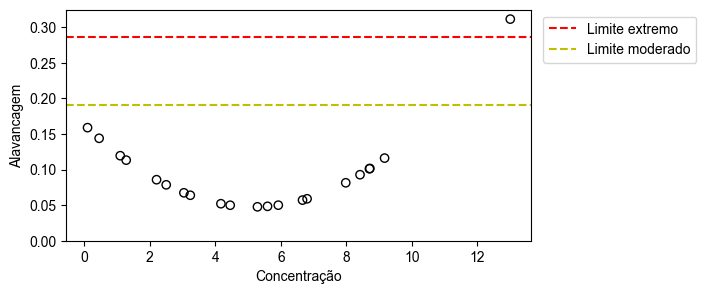

In [10]:
plt.figure(figsize=(6,3))
x_aux = range(0,df.shape[0])
plt.scatter(df[nome_conc], df['Leverage'], color='k', facecolor='none')


plt.axhline(y=limite_extreme, color="r", linestyle="--", label="Limite extremo")
plt.axhline(y=limite_mild, color="y", linestyle="--", label="Limite moderado")
plt.ylim(bottom=0)

plt.ylabel("Alavancagem")
plt.xlabel("Concentração")
plt.legend(bbox_to_anchor=(1.01,1))
plt.show()

## Regressão linear com SciPy

In [11]:
reg_linear = stats.linregress(df[nome_conc], df[nome_sinal])

### Coeficiente angular ( $b_{1}$ )

$$b_{1} = \frac{\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i} - \overline{y})}{\sum_{i=1}^{n}(x_{i} - \overline{x})^{2}}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $x_{i}$ é o valor da concentração para a i-ésima observação;
- $\overline{x}$ é a média das concentrações;

> Tem unidade do sinal vezes o inverso da unidade da concentração

In [12]:
b1 = reg_linear[0]
b1

3.315576794625358

### Coeficiente linear ( $b_{0}$ )

$$b_{0} = \frac{\sum_{i=1}^{n} (y_{i}) - b_{1} \times \sum_{i=1}^{n} (x_{i}) }{n}$$

onde:
- $n$ é o número total de observações;
- $b_{1}$ é o coeficiente angular;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $x_{i}$ é o valor da concentração para a i-ésima observação;

> Tem unidade do sinal

In [13]:
b0 = reg_linear[1]
b0

8.526413502785303

### Equação da reta 

$$sinal = b_{0} + concentração \times b_{1}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;

In [14]:
f"sinal = {b0} + concentração x {b1}"

'sinal = 8.526413502785303 + concentração x 3.315576794625358'

### Predição valores pontuais

In [15]:
df["ypred"] = b1*df[nome_conc] + b0
df

,Concentração,Sinal,Ordem de coleta,Ensaio,xi-xmedio,Leverage,ypred
0,0.10000,-0.0716,1,Ensaio 1,25.802602,0.158964,8.857971
1,0.45401,4.1673,2,Ensaio 2,22.331448,0.143985,10.031719
2,1.09765,6.5703,3,Ensaio 3,16.662530,0.119522,12.165756
3,1.27936,13.8150,4,Ensaio 4,15.212076,0.113263,12.768230
4,2.20611,11.4501,5,Ensaio 5,8.841799,0.085774,15.840941
5,2.50064,12.9554,6,Ensaio 6,7.176967,0.078589,16.817477
6,3.04030,20.1575,7,Ensaio 7,4.576717,0.067369,18.606762
7,3.23583,17.5633,8,Ensaio 8,3.778344,0.063924,19.255056
8,4.16990,26.0317,9,Ensaio 9,1.019547,0.052019,22.352037
9,4.45308,22.7573,10,Ensaio 10,0.527869,0.049897,23.290942


### Plotando o gráfico de regressão

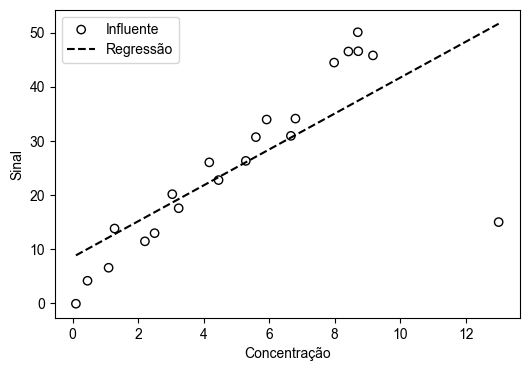

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
plt.plot(df[nome_conc], df['ypred'], label="Regressão", c='k', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## ANOVA

In [17]:
# ordenando os dados em relação a coluna concentração para organizar melhor os calculos
df = df.sort_values(by=[nome_conc])

### Somatório dos quadrados TOTAIS ( $SQT$ )

$$ SQT = \sum_{i=1}^{n} (y_{i} - \overline{y})^{2}$$

onde:
- $n$ é o número total de observações;
- $y_{i}$ é o valor do sinal para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [18]:
df['sqt'] = np.square(df[nome_sinal] - df[nome_sinal].mean())

In [19]:
SQT = df['sqt'].sum()
SQT

4627.210546889524

### Grau de liberdade dos quadrados totais ( $gl_{totais}$ )

$$gl_{totais} = n - 1$$

onde:
- $n$ é o número total de observações;

In [20]:
gl_total = df.shape[0] - 1
gl_total

20

### Média dos quadrados totais ( $MSQT$ )

$$ MSQT = \frac{SQT}{gl_{totais}}$$

onde:
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;
- $gl_{totais}$ é o grau de liberdade associado aos $SQT$;

> Tem a unidade do sinal ao quadrado

In [21]:
MSQT = SQT/gl_total
MSQT

231.36052734447622

### Somatório dos quadrados da REGRESSÃO ( $SQR$ )

$$ SQR = \sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}$$


onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;

> Tem a unidade do sinal ao quadrado

In [22]:
df['sqr'] = np.square(df["ypred"] - df[nome_sinal].mean())

In [23]:
SQR = df['sqr'].sum()
SQR

2547.487442591252

### Grau de liberdade da regressão ( $gl_{regressão}$ )

$$gl_{regressão} = 1 $$

In [24]:
gl_reg = 1
gl_reg

1

### Média da soma dos quadrados da regressão ( $MSQR$ )

$$MSQR = \frac{SQR}{gl_{regressão}}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;

In [25]:
MSQR = SQR/gl_reg
MSQR

2547.487442591252

### Somatório dos quadrados dos ERROS ( $SQE$ )

$$SQE = \sum_{i=1}^{n} (\widehat{y_{i}} - y_{i})^{2}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $y_{i}$ é o valor do sinal para a i-ésima observação;

> Tem a unidade do sinal ao quadrado

In [26]:
df['sqe'] = np.square(df["ypred"] - df[nome_sinal])

In [27]:
SQE = df['sqe'].sum()
SQE

2079.723104298271

### Grau de liberdade dos erros ( $gl_{erros}$ )

$$gl_{erros} = n - 2$$

onde:
- $n$ é o número total de observações;

In [28]:
gl_erro = df.shape[0] - 2
gl_erro

19

### Média da soma dos quadrados dos erros ( $MSQE$ )

$$MSQE = \frac{SQE}{gl_{erros}}$$

onde:
- $SQE$ é o somatório quadrático da diferença entre cada sinal e respectivo sinal predito;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Tem a unidade do sinal ao quadrado

In [29]:
MSQE = SQE/gl_erro
MSQE

109.4591107525406

### Estatística do teste ( $F_{calculado}$ )

$$ F_{calculado} = \frac{MSQR}{MSQE}$$

onde:
- $MSQR$ é a quantidade média de variância que o modelo consegue explicar;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;



In [30]:
Fcalc = MSQR/MSQE
Fcalc

23.273416210647625

### Valor crítico ( $F_{critico}$ )

$$F_{crítico} = F_{1-\alpha, gl_{regressão}, gl{erros}}$$

onde:
- $\alpha$ é o nível de significância adotado;
- $gl_{regressão}$ é o grau de liberdade assiciado a regressão;
- $gl_{erros}$ é o grau de liberdade assiciado aos erros;

> Utiliza-se a distribuição F unilateral

In [31]:
Ftab = stats.f.ppf(1-alfa, gl_reg, gl_erro)
Ftab

4.380749692331796

### p-valor ( $p-valor$ ) 

In [32]:
p_valor = 1- stats.f.cdf(Fcalc, gl_reg, gl_erro)
p_valor

0.00011786048721962317

### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \beta_{1} = 0$$

$$H_{1}: \beta_{1} \neq 0$$

#### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);


#### Utilizando o valor crítico

- Se $F_{crítico} \geq F_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***não é significativa***);
- Se $F_{crítico} < F_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão ***é significativa***);

In [33]:
if p_valor < alfa:
    anova_significativo = "Sim"
else:
    anova_significativo = "Não"
    
f"A regressão é significativa? {anova_significativo}"

'A regressão é significativa? Sim'

### Verificações

#### Somatório dos quadrados

$$ SQT = SQR + SQE$$

In [34]:
SQT == SQR + SQE

False

#### Graus de liberdade

$$ gl_{total} = gl_{regressão} + gl_{erros}$$

In [35]:
gl_total == gl_reg + gl_erro

True

### Tabela de ANOVA

In [36]:
df_anova = pd.DataFrame({
    "Fonte de Variação": ["Regressão", "Resíduos", "Total"],
    "Somatório": [SQR, SQE, SQT],
    "gl": [gl_reg, gl_erro, gl_total],
    "Médias": [MSQR, MSQE, MSQT],
    "F calculado": [Fcalc, "", ""],
    "F tabelado": [Ftab, "", ""],
    "p-valor": [p_valor, "", ""],
    "Singnificativo?": [anova_significativo, "", ""]
})
df_anova

,Fonte de Variação,Somatório,gl,Médias,F calculado,F tabelado,p-valor,Singnificativo?
0,Regressão,2547.487443,1,2547.487443,23.273416,4.38075,0.000118,Sim
1,Resíduos,2079.723104,19,109.459111,,,,
2,Total,4627.210547,20,231.360527,,,,


### Gráfico da distribuição F

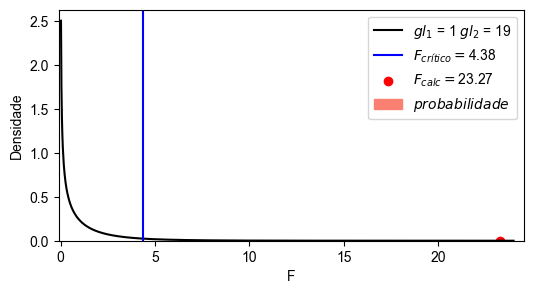

In [37]:
# Verificando qual é o maior valor para adaptar o intervalo do eixo x
if Fcalc > Ftab:
    x_max = Fcalc*1.05
else:
    x_max = Ftab*1.05 + 5
    
# obtendo valores de x para o gráfico
x = np.linspace(0, int(x_max), 1000)
  
# criando uma instância para a distribuição F com grau de liberdade do teste
f1 = stats.f(gl_reg, gl_erro, 0)

# plotando o gráfico
# criando o canvas
plt.figure(figsize=(6, 3))
# adicionando a linha com valores teórios
legend = '$gl_{1}$ = ' + str(gl_reg) + ' $gl_{2}$ = ' + str(gl_erro)
plt.plot(x, f1.pdf(x), label = legend, color = 'black')

# adicionando a linha com o valor crítico
legend = '$F_{crítico} = $' + str(round(Ftab, 2))
plt.axvline(Ftab, 0, 1, label=legend, color='blue')

# adicionando o ponto com o valor da estatística do teste
legend = '$F_{calc} = $' + str(round(Fcalc, 2))
plt.scatter(Fcalc, 0, color='red', label=legend)

# preenchendo a área do p-valor
x = np.linspace(Fcalc, int(x_max), 1000)
plt.fill_between(x, f1.pdf(x), label = '$probabilidade$', color = 'salmon')

# ajustando o gráfico
plt.xlim(-.1, x_max + 0.1)
plt.ylim(bottom=0.0)
plt.xlabel('F')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Coeficiente de determinação ( $R^{2}$ )

$$R^{2} = \frac{SQR}{SQT}$$

onde:
- $SQR$ é o somatório quadrático da diferença entre cada sinal predito e a média dos sinais;
- $SQT$ é o somatório quadrático da diferença entre cada sinal e a média dos sinais;


$$R^{2} = \frac{\sum_{i=1}^{n} (\widehat{y_{i}} - \overline{y})^{2}}{\sum_{i=1}^{n} (y_{i} - \overline{y})^{2}}$$

onde:
- $n$ é o número total de observações;
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;
- $y_{i}$ é o valor do sinal para a i-ésima observação;


In [38]:
R2 = SQR/SQT
R2

0.5505449593824315

### Coeficiente de determinação ajustado ( $R_{ajustado}^{2}$ )

$$R_{ajustado}^{2} = 1 - \frac{MSQE}{MSQT}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $MSQT$ é a média de toda a variância;

In [39]:
R2ajustado = 1 - MSQE/MSQT
R2ajustado

0.5268894309288755

## Diagnóstico do modelo

### Resíduos ( $resíduos$ )

$$ resíduos = y_{i} - \widehat{y_{i}}$$

onde:
- $\widehat{y_{i}}$ é o valor do sinal predito para a i-ésima observação;
- $\overline{y}$ é a média dos sinais;


In [40]:
df['Resíduos'] = df[nome_sinal] - df['ypred']

### Média dos resíduos igual a zero (teste t de Student pareado)

$$t_{calc} = \frac{(\overline{resíduos} - \mu_{0}) \times \sqrt{n}}{s_{resíduos}}$$


onde:
- $n$ é o número total de observações;
- $\overline{resíduos}$ é a média dos resíduos;
- $\mu_{0}$ é o valor esperado para os resíduos, ( e.g., $\mu_{0}=0$ );
- $s_{resíduos}$ é o desvio padrão dos resíduos ( $\sqrt{MSQE}$ );

#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: \overline{resíduos} = \mu_{0} = 0$$

$$H_{1}: \overline{resíduos} \neq \mu_{0} \neq 0$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{calculado}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a média dos resíduos é ***diferente de zero***);
- Se $t_{crítico} < t_{calculado}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (a regressão média dos resíduos é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [41]:
print(f"Os resídos tem média = {df['Resíduos'].mean()} e desvio padrão = {np.sqrt(MSQE)}")

Os resídos tem média = -1.0150610510858574e-15 e desvio padrão = 10.462270821984136


In [42]:
paired_t_test_mean = df['Resíduos'].mean()/(np.sqrt(MSQE)/np.sqrt(df.shape[0]))
paired_t_test_mean

-4.4460654677645e-16

In [43]:
paired_t_test_mean_p = (1 - stats.t.cdf(np.abs(paired_t_test_mean), gl_erro))*2
paired_t_test_mean_p

0.9999999999999996

In [44]:
if paired_t_test_mean_p < alfa:
    print(f"A média dos resíduos é diferente de 0 (p-valor = {round(paired_t_test_mean_p, 2)})")
else:
    print(f"A média dos resíduos é igual a 0 (p-valor = {round(paired_t_test_mean_p, 2)})")

A média dos resíduos é igual a 0 (p-valor = 1.0)


In [45]:
t_critico = stats.t.ppf(1-alfa/2, gl_erro)
t_critico

2.093024054408263

#### Gráfico da distribuição t de Student para a média dos resíduos

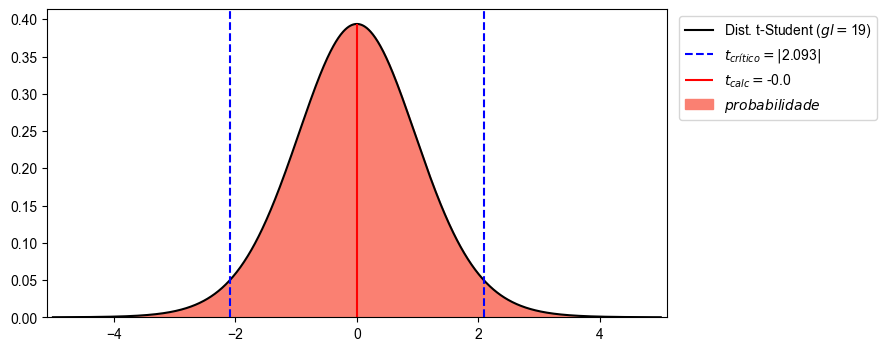

In [46]:
# setando os limites do gráfico
x_min = -5
x_max = 5

# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# criando valores para a distribuição t de Student com gl_erros
x = np.linspace(x_min, x_max, 1000)
y = stats.t.pdf(x, gl_erro)
label = "Dist. t-Student ($gl=$" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

# adicionando linhas com o valor crítico do teste
label= '$t_{crítico} = |$' + str(round(t_critico, 3)) + '$|$'
ax1.axvline(stats.t.ppf(1-alfa/2, gl_erro), 0, 1, label=label, color='blue', ls='--')
ax1.axvline(stats.t.ppf(alfa/2, gl_erro), 0, 1, color='blue', ls='--')

# adicionando o valor da estatística do teste
label = "$t_{calc} = $" + str(round(paired_t_test_mean, 3))
ax1.vlines(paired_t_test_mean, 0, stats.t.pdf(paired_t_test_mean, gl_erro, loc=0, scale=1), label=label, color='red')

# preenchendo o lado esquero
x = np.linspace(x_min, -1*abs(paired_t_test_mean), 1000)
ax1.fill_between(x, stats.t.pdf(x, gl_erro), label = '$probabilidade$', color = 'salmon')

# preenchendo o lado direito
x = np.linspace(abs(paired_t_test_mean), x_max, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(x_min - .1, x_max + .1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

### Resíduos apresentam distribuição Normal ( Shapiro-Wilk )


#### Conclusão do teste

Hipóteses do teste:

$$H_{0}: Os \; resíduos \; apresentam \; distribuição \; Normal$$

$$H_{1}: Os \; resíduos \; não \; apresentam \; distribuição \; Normal$$


##### Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***não apresentam distribuição Normal***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (os resíduos ***apresentam distribuição Normal***);


In [47]:
norm_test_stats, norm_test_p_value = stats.shapiro(df['Resíduos'])

In [48]:
if norm_test_p_value < alfa:
    print(f"Os resíduos não apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")
else:
    print(f"Os resíduos apresentam distribuição Normal (p_valor = {round(norm_test_p_value, 3)})")

Os resíduos não apresentam distribuição Normal (p_valor = 0.0)


### Independência dos resíduos em relação à ordem de coleta


#### Gráfico dos resíduos *versus* ordem de coleta

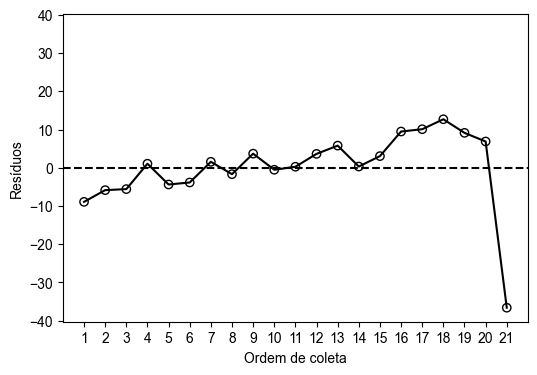

In [49]:
# criando uma cópia do df frame com os resíduos e a ordem de coleta apenas
df_aux = df[[nome_ordem, "Resíduos",]].copy()
colunas = df_aux.columns
# ordenando os dados em relação a ordem de coleta
df_aux = df_aux.sort_values(by=[colunas[0]])
# obtendo maior resíduo (absoluto) para utilizar como y_min
y_min = np.max([np.abs(df_aux[colunas[1]].min()), np.abs(df_aux[colunas[1]].max())])

# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os resíduos
plt.scatter(df_aux[colunas[0]], df_aux[colunas[1]], edgecolors='k', facecolor='None', label="Resíduos")
plt.plot(df_aux[colunas[0]], df_aux[colunas[1]], c='k')
plt.xlabel(nome_ordem)
plt.ylabel("Resíduos")
plt.axhline(y=0, color="black", linestyle="--")
plt.ylim(bottom= -1.1*y_min, top = 1.1*y_min )    
plt.xticks(df_aux[colunas[0]])
plt.show()

### Independência dos resíduos em relação ao ajustamento

#### Gráfico dos resíduos *versus* sinal predito

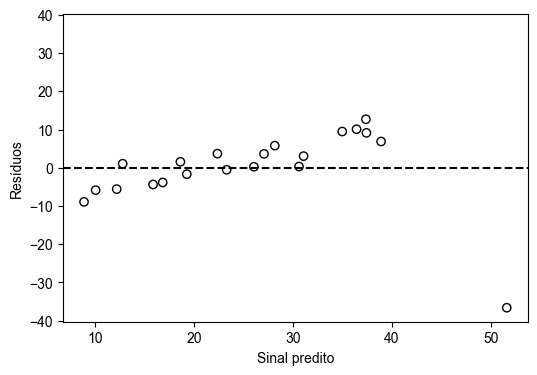

In [50]:
# criando uma cópia do df frame com os resíduos e o sinal predito
df_aux = df[["ypred", "Resíduos",]].copy()
colunas = df_aux.columns
# obtendo maior resíduo (absoluto) para utilizar como y_min
y_min = np.max([np.abs(df_aux[colunas[1]].min()), np.abs(df_aux[colunas[1]].max())])

plt.figure(figsize=(6,4))
plt.scatter(df_aux[colunas[0]], df_aux[colunas[1]], edgecolors='k', facecolor='None')
plt.xlabel("Sinal predito")
plt.ylabel("Resíduos")
plt.axhline(y=0, color="black", linestyle="--")
plt.ylim(bottom= -1.1*y_min, top = 1.1*y_min )    

plt.show()

### Outliers (Resíduos padronizados)

$$resíduo \; padronizado_{i} = \frac{resíduo_{i}}{\sqrt{MSQE}}$$

onde:
- $resíduo_{i}$ é o resíduo da i-ésima observação;
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;


#### Conclusão

> Se $|resíduo \; padronizado_{i}| > 3 $, a i-ésima observação é um possível outlier

In [51]:
df['Resíduos Padronizados'] = df["Resíduos"]/np.sqrt(MSQE)
colunas = [nome_ensaio, nome_conc, nome_sinal, 'ypred', 'Resíduos Padronizados']
limite_padronizado = 3
df_aux_padronizado = df[df['Resíduos Padronizados'].abs() > limite_padronizado][colunas].copy()
if df_aux_padronizado.shape[0] > 0:
    print(df_aux_padronizado)
else:
    print(f"Nenhum resíduo padronizado é maior do que {limite_padronizado}")



       Ensaio  Concentração  Sinal      ypred  Resíduos Padronizados
20  Ensaio 21          13.0   15.0  51.628912              -3.501048


#### Gráfico dos resíduos padronizados *versus* sinal predito

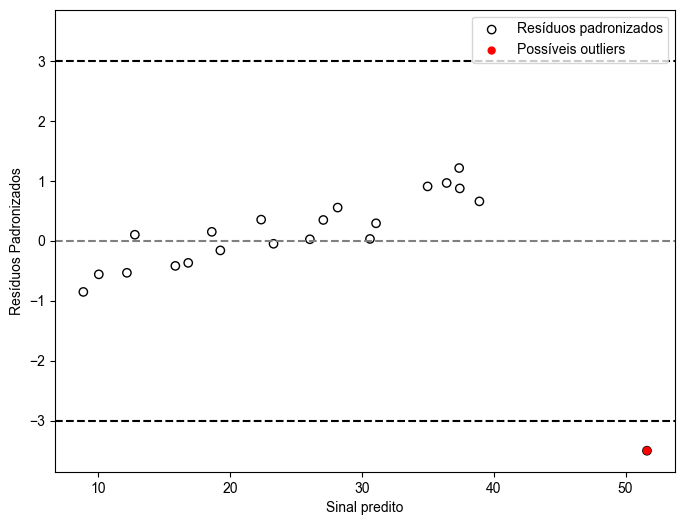

In [52]:
# criando uma cópia do df frame com os resíduos e o sinal predito
df_aux = df[["ypred", "Resíduos Padronizados",]].copy()
colunas = df_aux.columns
# obtendo maior resíduo (absoluto) para utilizar como y_min
y_min = np.max([np.abs(df_aux[colunas[1]].min()), np.abs(df_aux[colunas[1]].max())])
if y_min < limite_padronizado:
    y_min = limite_padronizado

    
# criando o canvas
plt.figure(figsize=(8,6))
# adicionando os resíduos
plt.scatter(df_aux[colunas[0]], df_aux[colunas[1]], edgecolors='k', facecolor='None', label="Resíduos padronizados")

# adicionado possíveis outliers, apenas se eles existirem
if df_aux_padronizado.shape[0] > 0:
    plt.scatter(df_aux_padronizado[colunas[0]], df_aux_padronizado[colunas[1]], 
                edgecolors='none', facecolor='r',  label="Possíveis outliers")

    
    plt.legend()

df_aux_padronizado
plt.xlabel("Sinal predito")
plt.ylabel("Resíduos Padronizados")
plt.axhline(y=0, color="gray", linestyle="--")
plt.axhline(y=limite_padronizado, color="k", linestyle="--")
plt.axhline(y=-1*limite_padronizado, color="k", linestyle="--")

plt.ylim(bottom= -1.1*y_min, top = 1.1*y_min )  
plt.show()

### Correlação dos resíduos ( $r_{pearson}$ )



$$r_{pearson} = \frac{\sum_{i=1}^n (y_i - \overline{y}) (\widehat{y_{i}} - \overline{\widehat{y}})}{\sqrt{\sum_{i=1}^n ((y_i - \overline{y})^2 \sum_{i=1}^n ((\widehat{y_{i}} - \overline{\widehat{y}})^2}}$$

onde
- $n$ é o número total de observações;
- $y_i$ é a i-ésima observação do sinal;
- $\overline{y}$ é a média do sinal;
- $\widehat{y_{i}}$ é a i-ésima observação do sinal predito;
- $\overline{\widehat{y}}$ é a média do sinal predito;


In [53]:
residual_r_pearson, _ = stats.pearsonr(df[nome_sinal], df['ypred'])

In [54]:
if residual_r_pearson > 0.90:
    print(f"A correlação entre o sinal experimental e o sinal predito é forte (r_pearson = {round(residual_r_pearson, 2)})")
else:
    print(f"A correlação entre o sinal experimentais e o sinal predito NÃO é forte (r_pearson = {round(residual_r_pearson, 2)})")

A correlação entre o sinal experimentais e o sinal predito NÃO é forte (r_pearson = 0.74)


#### Gráfico do sinal predito *versus* sinal real

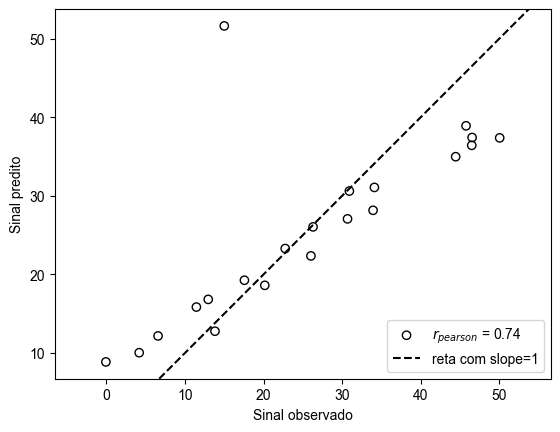

In [55]:
# obtendo o limite inferior para o eixo x
if df[nome_sinal].min() > df['ypred'].min():
    x_min = df['ypred'].min()
else:
    x_min = df[nome_sinal].min()

# obtendo o limite inferior para o eixo y    
if df[nome_sinal].max() > df['ypred'].max():
    x_max = df[nome_sinal].max()
else:
    x_max = df['ypred'].max()  
    
x_max = x_max + 0.2*x_min
x_min = x_min - 0.2*x_min

# criando o canvas
plt.figure()
# adicionando os resíduos
text = "$r_{pearson}$" + f" = {round(residual_r_pearson, 2)}"
plt.scatter(df[nome_sinal], df['ypred'], edgecolors='k', facecolor='None', label=text)
# adicionando reta com slope = 1
plt.axline(xy1=(df[nome_sinal].mean(), df[nome_sinal].mean()), slope=1, color="black", linestyle="--", label="reta com slope=1")
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.xlabel("Sinal observado")
plt.ylabel("Sinal predito")
plt.legend(loc=4)
plt.axis('equal')
plt.show()

## Intervalo de confiança dos parâmetros

### Coeficiente angular ( $b_{1}$ )


#### Desvio padrão

$$s_{b_{1}} = \sqrt{\frac{MSQE}{S_{xx}}}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração, que é estimado por:

$$S_{xx} = \sum_{i=1}^{n} (x_{i} - \overline{x})^2$$

onde:
- $n$ é o número total de observações;
- $x_i$ é a i-ésima observação da concentração;
- $\overline{x}$ é a média da concentração;

> O $S_{xx}$ tem unidade da concentração ao quadrado

> O $s_{b_{1}}$ tem unidade do sinal divido pelo sinal da concentração

In [56]:
# df['sxx'] = np.square(df[nome_conc] - df[nome_conc].mean())
# Sxx = np.sum(df['sxx'])
# Sxx

In [57]:
b1_std = np.sqrt(MSQE/Sxx)
b1_std

0.6872725894396905

#### Intervalo de confiança ( $IC_{b_{1}}$ )

$$ IC_{b_{1}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{1}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal divido pelo sinal da concentração

In [58]:
ic_b1 = t_critico*b1_std
ic_b1

1.4384780616327266

#### Valor verdadeiro

O valor verdadeiro de $b_{1}$ esta dentro do intervalo:

$$b_{1} - IC_{b_{1}} \leq b_{1} \leq b_{1} + IC_{b_{1}}$$


In [59]:
f"{round(b1 - ic_b1, 4)} ≤ b1 ≤  {round(b1 + ic_b1, 4)}" 

'1.8771 ≤ b1 ≤  4.7541'

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{1}} = \frac{b_{1}}{s_{b_{1}}}$$

onde:
- $b_{1}$ é o coeficiente angular;
- $s_{b_{1}}$ é o desvio padrão do coeficiente angular;


Hipótese:

$$H_{0}: \beta_{1} = 0$$
$$H_{1}: \beta_{1} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente angular é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [60]:
t_b1 = b1/b1_std
t_b1

4.8242529173590825

In [61]:
p_valor_b1 = (1 - stats.t.cdf(t_b1, gl_erro))*2
p_valor_b1

0.00011786048721962317

In [62]:
if p_valor_b1 < alfa:
    b1_significante = "Sim"
    print(f"O coeficiente angular ({round(b1, 3)}) é diferente de zero (p-valor = {round(p_valor_b1, 3)})")
else:
    b1_significante = "Não"
    print(f"O coeficiente angular ({round(b1, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 3)})")


O coeficiente angular (3.316) é diferente de zero (p-valor = 0.0)


##### Gráfico da distribuição t de Student para o $b_{1}$

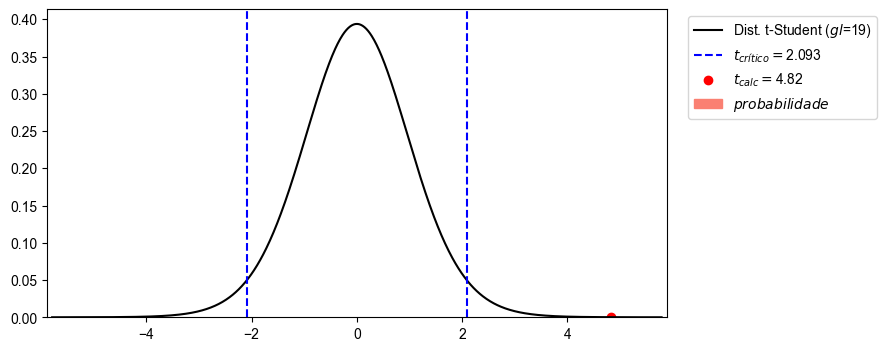

In [63]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b1):
    x_aux = 5
else:
    x_aux = np.abs(t_b1) + 0.2*np.abs(t_b1)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b1, 2))
ax1.scatter(t_b1, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b1), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b1), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

### Coeficiente linear ( $b_{0}$ )


#### Desvio padrão

$$s_{b_{0}} = \sqrt{MSQE \left( \frac{1}{n} + \frac{\overline{x}^{2}}{S_{xx}} \right)}$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;



> O $s_{b_{0}}$ tem unidade do sinal

In [64]:
b0_std = np.sqrt(MSQE*(1/df.shape[0] + df[nome_conc].mean()**2/Sxx))
b0_std

4.229021421531077

#### Intervalo de confiança ( $IC_{b_{0}}$ )

$$ IC_{b_{0}} = t_{gl_{erros}, 1-\alpha/2} \times s_{b_{0}}$$

onde:
- $t_{gl_{erros}, 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{b_{0}}$ é o desvio padrão do coeficiente angular

> Tem unidade do sinal

In [65]:
ic_b0 = b0_std*t_critico
ic_b0

8.85144356187237

#### Valor verdadeiro

O valor verdadeiro de $b_{0}$ esta dentro do intervalo:

$$b_{0} - IC_{b_{0}} \leq b_{0} \leq b_{0} + IC_{b_{0}}$$

In [66]:
f"{round(b0 - ic_b0, 4)} ≤ b0 ≤  {round(b0 + ic_b0, 4)}" 

'-0.325 ≤ b0 ≤  17.3779'

#### Teste de hipótese

A estatística do teste é:

$$t_{b_{0}} = \frac{b_{0}}{s_{b_{0}}}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $s_{b_{0}}$ é o desvio padrão do coeficiente linear;


Hipótese:

$$H_{0}: \beta_{0} = 0$$
$$H_{1}: \beta_{0} \neq 0$$


##### Conclusão Utilizando o p-valor

- Se $p-valor \geq \alpha$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $p-valor < \alpha$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);


##### Utilizando o valor crítico

- Se $t_{crítico} \geq t_{b_{1}}$, falha em rejeitar a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***diferente de zero***);
- Se $t_{crítico} < t_{b_{1}}$, rejeita a hipótese nula com o nível de singificância adotado $\alpha$ nível de singnificância (o coeficiente linear é ***igual a zero***);

O valor crítico do teste é obtido da distribuição t de Student bilateral com $gl_{erros}$.

In [67]:
t_b0 = b0/b0_std
t_b0

2.016167016647174

In [68]:
p_valor_b0 = (1 - stats.t.cdf(t_b0, gl_erro))*2
p_valor_b0

0.05814417173569009

In [69]:
if p_valor_b0 < alfa:
    b0_significante = "Sim"
    print(f"O coeficiente linear ({round(b0, 3)}) é diferente de zero (p-valor = {round(p_valor_b0, 3)})")
else:
    b0_significante = "Não"
    print(f"O coeficiente linear ({round(b0, 3)}) é igual a zero (p-valor = {round(p_valor_b1, 0)})")


O coeficiente linear (8.526) é igual a zero (p-valor = 0.0)


##### Gráfico da distribuição t de Student para o $b_{0}$

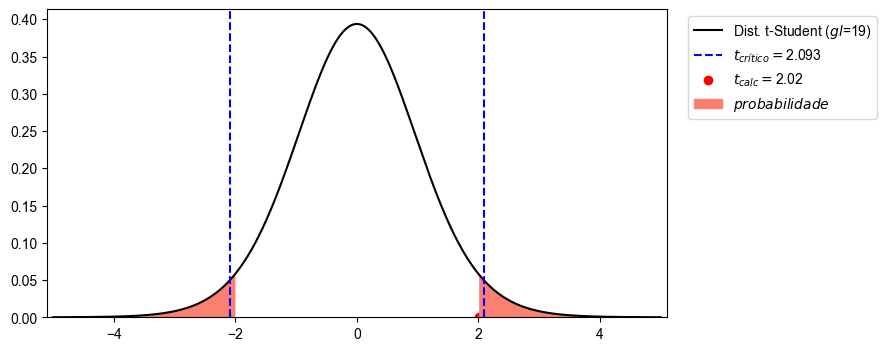

In [70]:
# obtendo intervalo de x para plotar o gráfico
if t_critico > np.abs(t_b0):
    x_aux = 5
else:
    x_aux = np.abs(t_b0) + 0.2*np.abs(t_b0)


# criando o canvas
fig, ax1 = plt.subplots(figsize=(8,4))

# adicionando a distribuição t de Student
x = np.linspace(-1*x_aux, x_aux, 1000)
y = stats.t.pdf(x, gl_erro, loc=0, scale=1)
label = "Dist. t-Student ($gl$=" + str(gl_erro) + ")"
ax1.plot(x, y, c="k", label=label)

label = '$t_{crítico} = $' + str(round(t_critico, 3))
ax1.axvline(t_critico, 0, 1, label=label, color='blue', ls='--')
ax1.axvline(-t_critico, 0, 1, color='blue', ls='--')

label = '$t_{calc} = $' + str(round(t_b0, 2))
ax1.scatter(t_b0, 0, color='red', label=label)

x = np.linspace(-1*x_aux, -1*np.abs(t_b0), 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), label = '$probabilidade$', color = 'salmon')

x = np.linspace(np.abs(t_b0), x_aux, 1000)
ax1.fill_between(x,stats.t.pdf(x, gl_erro, loc=0, scale=1), color = 'salmon')

plt.xlim(-1*x_aux - 0.1, x_aux + 0.1)
plt.ylim(bottom=0.0)
plt.legend(bbox_to_anchor=(1.35,1))
plt.show()

## Intervalo de confiança do sinal predito

### Valores médios

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração utilizada para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [71]:
# criando um novo dataframe com apenas informações relevantes para a predição
df_pred = df[[nome_conc, nome_sinal, 'ypred']].copy()

In [72]:
df_pred["Médios IC"] = t_critico*np.sqrt(MSQE*(1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Médios L. Inferior"] = df_pred['ypred'] -  df_pred["Médios IC"]
df_pred["Médios L. Superior"] = df_pred['ypred'] +  df_pred["Médios IC"]
df_pred

,Concentração,Sinal,ypred,Médios IC,Médios L. Inferior,Médios L. Superior
0,0.10000,-0.0716,8.857971,8.730704,0.127267,17.588675
1,0.45401,4.1673,10.031719,8.309188,1.722530,18.340907
2,1.09765,6.5703,12.165756,7.570494,4.595263,19.736250
3,1.27936,13.8150,12.768230,7.369604,5.398625,20.137834
4,2.20611,11.4501,15.840941,6.413234,9.427707,22.254175
5,2.50064,12.9554,16.817477,6.138784,10.678694,22.956261
6,3.04030,20.1575,18.606762,5.683677,12.923085,24.290438
7,3.23583,17.5633,19.255056,5.536440,13.718616,24.791497
8,4.16990,26.0317,22.352037,4.994359,17.357679,27.346396
9,4.45308,22.7573,23.290942,4.891444,18.399498,28.182387


#### Gráfico de calibração com as bandas médias

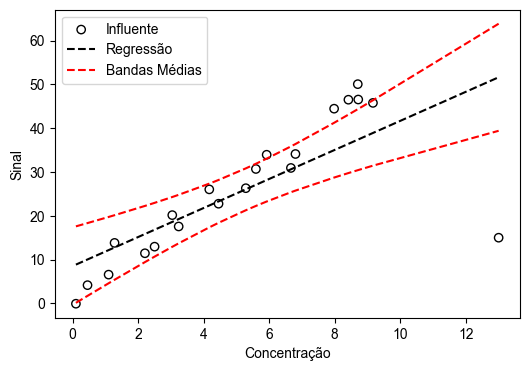

In [73]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='r', ls='--', label="Bandas Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Valores pontuais

Valores preditos pelo modelo podem ser obtidos através da relação:

$$\widehat{y_{interesse}} = b_{0} + b_{1} \times x_{interesse}$$

onde:
- $\widehat{y_{imteresse}}$ é o sinal predito;
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;


#### Desvio padrão

$$s_{x_{interesse}} = \sqrt{MSQE \left(\frac{1}{m} + \frac{1}{n} + \frac{\left( x_{interesse} - \overline{x} \right)^{2} }{S_{xx}} \right) }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração
- $n$ é o número total de observações;
- $m$ é o número de repetições obtidos para $x_{interesse}$;
- $\overline{x}$ é a média da concentração;
- $x_{interesse}$ é uma concentração qualquer, dentro do intervalo de concentração utilizado para confeccionar o modelo;

#### Intervalo de confiança

$$IC \left( \widehat{y_{interesse}} \right) = t_{gl_{erros}, \; 1-\alpha/2} \times s_{x_{interesse}} $$

onde:
- $s_{x_{interesse}}$ é o desvio padrão de $\widehat{y_{interesse}}$;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;

In [74]:
df_pred["Individuais IC"] = t_critico*np.sqrt(MSQE*(1 + 1/df.shape[0] + np.square(df_pred[nome_conc] - df[nome_conc].mean())/Sxx))
df_pred["Individuais L. Inferior"] = df_pred['ypred'] -  df_pred["Individuais IC"]
df_pred["Individuais L. Superior"] = df_pred['ypred'] +  df_pred["Individuais IC"]
df_pred

,Concentração,Sinal,ypred,Médios IC,Médios L. Inferior,Médios L. Superior,Individuais IC,Individuais L. Inferior,Individuais L. Superior
0,0.10000,-0.0716,8.857971,8.730704,0.127267,17.588675,23.574099,-14.716128,32.432070
1,0.45401,4.1673,10.031719,8.309188,1.722530,18.340907,23.421263,-13.389545,33.452982
2,1.09765,6.5703,12.165756,7.570494,4.595263,19.736250,23.169492,-11.003735,35.335248
3,1.27936,13.8150,12.768230,7.369604,5.398625,20.137834,23.104632,-10.336403,35.872862
4,2.20611,11.4501,15.840941,6.413234,9.427707,22.254175,22.817593,-6.976652,38.658533
5,2.50064,12.9554,16.817477,6.138784,10.678694,22.956261,22.741980,-5.924502,39.559457
6,3.04030,20.1575,18.606762,5.683677,12.923085,24.290438,22.623376,-4.016614,41.230138
7,3.23583,17.5633,19.255056,5.536440,13.718616,24.791497,22.586835,-3.331779,41.841892
8,4.16990,26.0317,22.352037,4.994359,17.357679,27.346396,22.460111,-0.108074,44.812148
9,4.45308,22.7573,23.290942,4.891444,18.399498,28.182387,22.437451,0.853492,45.728393


#### Gráfico de calibração com as bandas pontuais

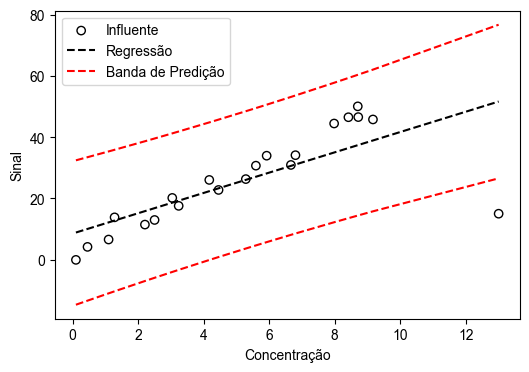

In [75]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda de predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Banda de Predição")
# adicionando banda de predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

### Gráfico da curva de calibração

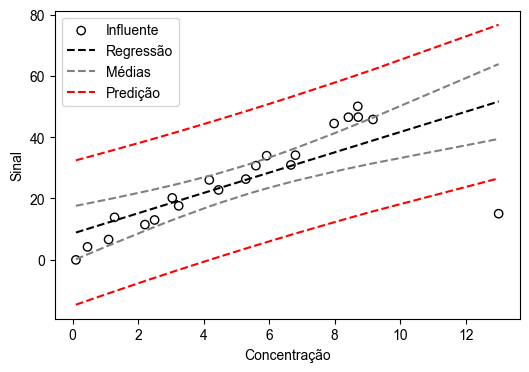

In [76]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os valores experimentais (do df original)
plt.scatter(df[nome_conc], df[nome_sinal], label=dataset_name, edgecolors='k', facecolor='None')
# adicionando a linha de regressão (df pred)
plt.plot(df_pred[nome_conc], df_pred['ypred'], label="Regressão", c='k', ls='--')
# adicionando banda média inferior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Inferior'], c='gray', ls='--', label="Médias")
# adicionando banda média superior
plt.plot(df_pred[nome_conc], df_pred['Médios L. Superior'], c='gray', ls='--')
# adicionando banda predição inferior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Inferior'], c='r', ls='--', label="Predição")
# adicionando banda predição superior
plt.plot(df_pred[nome_conc], df_pred['Individuais L. Superior'], c='r', ls='--')
plt.xlabel(nome_conc)
plt.ylabel(nome_sinal)
plt.legend()
plt.show()

## Predição de uma nova concentração

Invertendo a equação:

$$concentração = \frac{sinal_{interesse} - b_{0}}{b_{1}} \pm t_{gl_{erros}, \; 1-\alpha/2} \times s_{c}$$

onde:
- $b_{0}$ é o coeficiente linear;
- $b_{1}$ é o coeficiente angular;
- $t_{gl_{erros}, \; 1-\alpha/2}$ é o valor crítico da distribuição t de Student bilateral;
- $s_{c}$ é o desvio padrão da concentração, que é estimado da seguinte forma:
- $sinal_{interesse}$ é o sinal para predizar a concentração;

$$s_{c} = \frac{\sqrt{MSQE}}{|b_{1}|} \sqrt{\frac{1}{m} + \frac{1}{n} + \frac{\left( sinal_{interesse} - \overline{sinal} \right)^{2}}{b_{1}^{2}S_{xx}} }$$

onde:
- $MSQE$ é a quantidade média de variância que o modelo não consegue explicar;
- $S_{xx}$ é o somatório do erro quadrático da concentração do modelo;
- $n$ é o número total de observações utilizada para obter os parâmetros do modelo;
- $m$ é o número de repetições obtidos para $sinal_{interesse}$;
- $\overline{sinal}$ é a média dos sinais utilizado para obter os parâmetros do modelo;
- $sinal_{interesse}$ é o sinal para predizar a concentração;
- $b_{1}$ é o coeficiente angular;

In [77]:
df_pred_inv = df[[nome_conc, nome_sinal]].copy()
df_pred_inv['ypred'] = (df_pred_inv[nome_sinal] - b0)/b1
df_pred_inv['s_predicao'] = (np.sqrt(MSQE)/np.abs(b1))*np.sqrt(1 + 1/df_pred_inv.shape[0] + np.square(df_pred_inv[nome_sinal] - df_pred_inv[nome_sinal].mean())/(np.square(b1)*Sxx))
df_pred_inv['ic_predicao'] = df_pred_inv['s_predicao']*t_critico
df_pred_inv['ic_predicao inferior'] = df_pred_inv['ypred'] - df_pred_inv['ic_predicao']
df_pred_inv['ic_predicao superior'] = df_pred_inv['ypred'] + df_pred_inv['ic_predicao']
df_pred_inv

,Concentração,Sinal,ypred,s_predicao,ic_predicao,ic_predicao inferior,ic_predicao superior
0,0.10000,-0.0716,-2.593218,3.609327,7.554408,-10.147626,4.961190
1,0.45401,4.1673,-1.314738,3.499071,7.323640,-8.638377,6.008902
2,1.09765,6.5703,-0.589977,3.444065,7.208511,-7.798488,6.618534
3,1.27936,13.8150,1.595073,3.314115,6.936522,-5.341450,8.531595
4,2.20611,11.4501,0.881803,3.350363,7.012391,-6.130587,7.894194
5,2.50064,12.9554,1.335812,3.326576,6.962604,-5.626792,8.298416
6,3.04030,20.1575,3.508013,3.248281,6.798731,-3.290718,10.306744
7,3.23583,17.5633,2.725585,3.269561,6.843271,-4.117686,9.568856
8,4.16990,26.0317,5.279711,3.229814,6.760078,-1.480368,12.039789
9,4.45308,22.7573,4.292130,3.234982,6.770896,-2.478766,11.063026


### Gráfico de predição

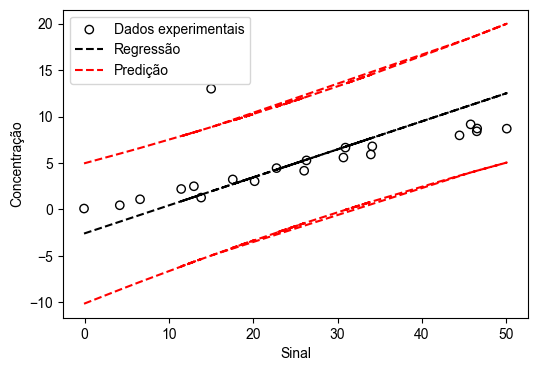

In [78]:
# criando o canvas
plt.figure(figsize=(6,4))
# adicionando os dados experimentais
plt.scatter(df[nome_sinal], df[nome_conc], label="Dados experimentais", edgecolors='k', facecolor='None')

# adicionando a linha de regressão
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ypred'], label="Regressão", c='k', ls='--')

# adicionando a banda de predição
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao inferior'], label='Predição', c='r', ls='--')
plt.plot(df_pred_inv[nome_sinal], df_pred_inv['ic_predicao superior'], c='r', ls='--')

plt.legend()
plt.xlabel(nome_sinal)
plt.ylabel(nome_conc)
plt.show()